# Chapter 9 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Reliability Analysis

In [2]:
import random
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import gamma
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import mistat
import lifelines

## Basic Notions

### Time Categories

### Reliability and Related Functions

## System Reliability

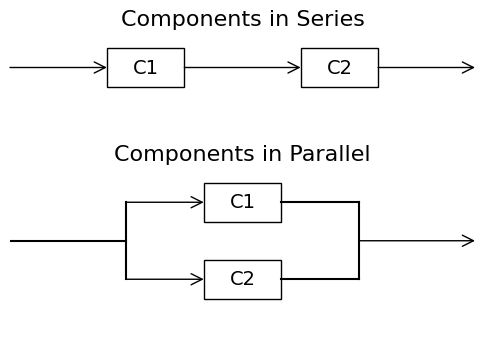

In [3]:
def labeledBox(ax, corner, sides, label):
    ax.add_patch(patch.Rectangle(corner, *sides, facecolor='none', edgecolor="black"))
    ax.annotate(label, (corner[0] + sides[0] / 2, corner[1] + sides[1] / 2), color='black',
                    fontsize=14, ha='center', va='center')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}

import matplotlib.patches as patch
fig, ax = plt.subplots(figsize=[6, 4])

y = 6.5
ax.text(3, y+1.75, 'Components in Series', va='center', ha='center', fontsize=16)
plt.annotate("", xy=(1.25, y+0.5), xytext=(0, y+0.5), arrowprops=prop)
labeledBox(ax, (1.25, y), (1, 1), 'C1')
plt.annotate("", xy=(3.75, y+0.5), xytext=(2.25, y+0.5), arrowprops=prop)
labeledBox(ax, (3.75, y), (1, 1), 'C2')
plt.annotate("", xy=(6, y+0.5), xytext=(4.75, y+0.5), arrowprops=prop)

y = 2.5
ax.text(3, y+2.25, 'Components in Parallel', va='center', ha='center', fontsize=16)
ax.plot((0, 1.5), (y, y), color='black')
ax.plot((1.5, 1.5), (y-1, y+1), color='black')
plt.annotate("", xy=(2.5, y-1), xytext=(1.5, y-1), arrowprops=prop)
plt.annotate("", xy=(2.5, y+1), xytext=(1.5, y+1), arrowprops=prop)
labeledBox(ax, (2.5, y+0.5), (1, 1), 'C1')
labeledBox(ax, (2.5, y-1.5), (1, 1), 'C2')
ax.plot((3.5, 4.5), (y-1, y-1), color='black')
ax.plot((3.5, 4.5), (y+1, y+1), color='black')
ax.plot((4.5, 4.5), (y-1, y+1), color='black')
plt.annotate("", xy=(6, y), xytext=(4.5, y), arrowprops=prop)

ax.set_xlim(0, 6)
ax.set_ylim(0, 8)
plt.axis('off')
plt.show()

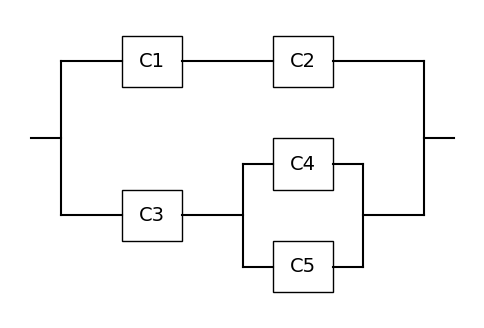

In [4]:
def labeledBox(ax, corner, sides, label):
    corner = list(corner)
    corner[1] = corner[1] - sides[1]/2
    ax.add_patch(patch.Rectangle(corner, *sides, facecolor='none', edgecolor="black"))
    ax.annotate(label, (corner[0] + sides[0] / 2, corner[1] + sides[1] / 2), color='black',
                    fontsize=14, ha='center', va='center')

prop = {'arrowstyle': "-",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}

import matplotlib.patches as patch
fig, ax = plt.subplots(figsize=[6, 4])

x1 = 1
x2 = 3
x3 = 5
x4 = 7
x5 = 8
x6 = 10
x7 = 11
x8 = 13
x9 = 14
y1 = 1.5
dy = 1
ax.plot((0, x1), (0, 0), color='black')
ax.plot((x1, x1), (-y1, y1), color='black')
ax.plot((x1, x2), (y1, y1), color='black')
ax.plot((x1, x2), (-y1, -y1), color='black')
ax.plot((x3, x5), (y1, y1), color='black')
ax.plot((x6, x8), (y1, y1), color='black')
ax.plot((x3, x4), (-y1, -y1), color='black')
ax.plot((x4, x4), (-y1-dy, -y1+dy), color='black')
ax.plot((x4, x5), (-y1-dy, -y1-dy), color='black')
ax.plot((x4, x5), (-y1+dy, -y1+dy), color='black')
ax.plot((x6, x7), (-y1-dy, -y1-dy), color='black')
ax.plot((x6, x7), (-y1+dy, -y1+dy), color='black')
ax.plot((x7, x7), (-y1-dy, -y1+dy), color='black')
ax.plot((x7, x8), (-y1, -y1), color='black')
ax.plot((x8, x8), (-y1, y1), color='black')
ax.plot((x8, x9), (0, 0), color='black')
labeledBox(ax, (x2, y1), (2, 1), 'C1')
labeledBox(ax, (x5, y1), (2, 1), 'C2')
labeledBox(ax, (x2, -y1), (2, 1), 'C3')
labeledBox(ax, (x5, -y1+dy), (2, 1), 'C4')
labeledBox(ax, (x5, -y1-dy), (2, 1), 'C5')
ax.set_ylim(-3.5, 2.5)
plt.axis('off')
plt.show()

## Availability of Repairable Systems

In [5]:
np.random.seed(1)
ttf = stats.gamma(2, scale=100).rvs(50)
ttr = stats.gamma(2, scale=1).rvs(50)

_ = mistat.availabilityEBD(ttf, ttr, n=1000, seed=1)
result = mistat.renewalEBD(ttf, ttr, time=1000, n=1000, seed=1)
np.quantile(result, [0.025, 0.975])

The estimated MTTF from ttf is 199.30
The estimated MTTR from ttr is 2.01
The estimated asymptotic availability is 0.9900

count    1000.000000
mean        0.989942
std         0.001436
min         0.984190
25%         0.989051
50%         0.990037
75%         0.990965
max         0.993396
Name: availability EBD, dtype: float64
The estimated MEAN NUMBER Of RENEWALS is 6.70
count    1000.000000
mean        6.698000
std         1.532039
min         3.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        13.000000
Name: number of renewals EBD, dtype: float64


array([ 4., 10.])

## Types of Observations on $TTF$

## Graphical Analysis of Life Data

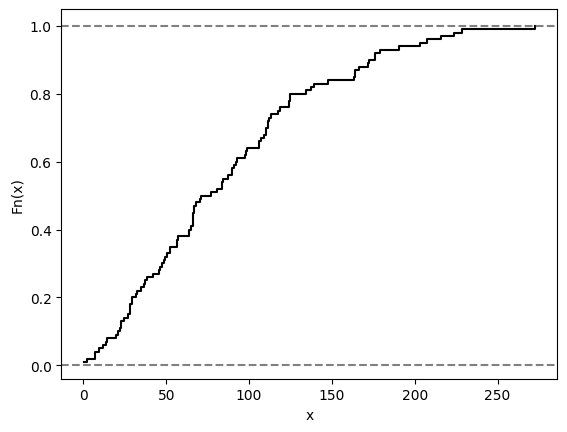

In [6]:
np.random.seed(1)
rv = stats.weibull_min(1.5, scale=100).rvs(100)

mistat.plotECDF(rv)
plt.show()

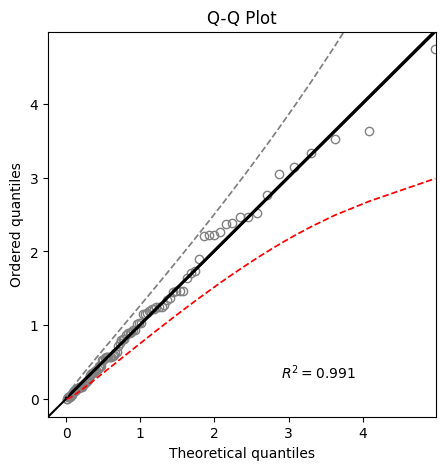

In [7]:
np.random.seed(1)
rv = stats.expon(scale=5).rvs(100)

fig, ax = plt.subplots(figsize=[5, 5])
pg.qqplot(rv, ax=ax, dist=stats.expon)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()

In [8]:
np.random.seed(1)
rv = stats.expon(scale=5).rvs(100)

# Use stats.probplot to get x and Ei values
res = stats.probplot(rv, dist=stats.expon, rvalue=True)
df = pd.DataFrame({'Ei': res[0][0], 'x': res[0][1]})
model = smf.ols('x ~ Ei - 1', data=df).fit()
print(f'regression parameter beta={model.params[0]:.3f}')
print(f'estimate median = {np.log(2) * model.params[0]:.3f}')
print(f'true median = {np.median(rv):.3f}')

regression parameter beta=4.774
estimate median = 3.309
true median = 3.185


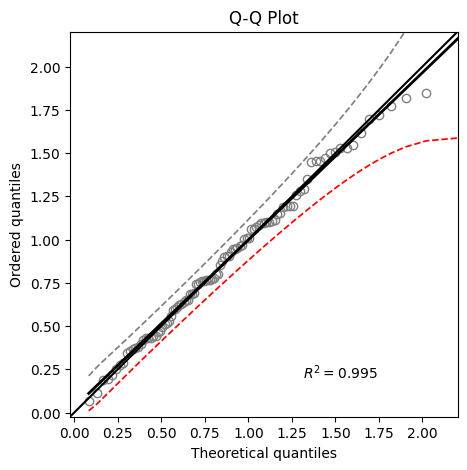

In [9]:
np.random.seed(1)
rv = stats.weibull_min(2, scale=2.5).rvs(100)

fig, ax = plt.subplots(figsize=[5, 5])
pg.qqplot(rv, ax=ax, dist=stats.weibull_min, sparams=[2])
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()

In [10]:
np.random.seed(1)
rv = stats.weibull_min(2, scale=2.5).rvs(100)

# Use stats.probplot to get x and Wi values
res = stats.probplot(rv, dist=stats.weibull_min, sparams=[1], rvalue=True)
df = pd.DataFrame({'Wi': np.log(res[0][0]), 'x': np.log(res[0][1])})
model = smf.ols('x ~ Wi', data=df).fit()
intercept, slope = model.params
print(f'intercept {intercept:.3f} / slope {slope:.3f}')

beta = np.exp(intercept)
nu = 1/slope
print(f'regression parameter nu={nu:.3f}')
print(f'regression parameter beta={beta:.3f}')
print(f'estimated median = {beta * np.log(2) ** (1/nu):.3f}')
print(f'estimated mean = {beta * gamma(1 + 1/nu):.3f}')
print(f'estimated std = {beta * np.sqrt(gamma(1 + 2/nu) - gamma(1+1/nu)**2):.3f}')
print(f'sample median = {np.median(rv):.3f}')
print(f'sample mean = {np.mean(rv):.3f}')
print(f'sample std = {np.std(rv):.3f}')

intercept 0.904 / slope 0.608
regression parameter nu=1.646
regression parameter beta=2.470
estimated median = 1.977
estimated mean = 2.209
estimated std = 1.378
sample median = 1.994
sample mean = 2.148
sample std = 1.146


## Nonparametric Estimation of Reliability

## Estimation of Life Characteristics

### Maximum Likelihood Estimators for Exponential TTF Distribution

regression parameter beta=3644.933


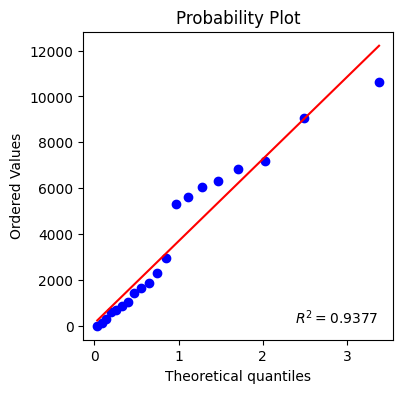

In [11]:
failtime = mistat.load_data('FAILTIME.csv')

fig, ax = plt.subplots(figsize=(4, 4))
res = stats.probplot(failtime, dist=stats.expon, plot=ax, rvalue=True)
df = pd.DataFrame({'Ei': res[0][0], 'x': res[0][1]})
model = smf.ols('x ~ Ei - 1', data=df).fit()
print(f'regression parameter beta={model.params[0]:.3f}')

In [12]:
epf = lifelines.ExponentialFitter().fit(failtime)
epf.summary
beta = epf.lambda_

In [13]:
epf = lifelines.ExponentialFitter().fit(failtime)
beta = epf.lambda_
table = epf.summary[['coef', 'se(coef)', 'coef lower 95%', 'coef upper 95%']]
style = table.style
style = style.format(precision=1)
s = style.to_latex(hrules=True)
s = s.replace('%', '\\%').replace('_', '\\_')
print(s)

\begin{tabular}{lrrrr}
\toprule
 & coef & se(coef) & coef lower 95\% & coef upper 95\% \\
\midrule
lambda\_ & 3543.4 & 792.3 & 1990.4 & 5096.3 \\
\bottomrule
\end{tabular}



In [14]:
beta = epf.lambda_
n = len(failtime)
ci_lower = 2*n*beta / stats.chi2.ppf(1-0.05/2, 2 * n)
ci_upper = 2*n*beta / stats.chi2.ppf(0.05/2, 2 * n)
ci_lower_approx = epf.summary.loc['lambda_', 'coef lower 95%']
ci_upper_approx = epf.summary.loc['lambda_', 'coef upper 95%']

In [15]:
# prepare sample
np.random.seed(1)
n = 50
t_star = 2000
ft = stats.expon.rvs(scale=1000, size=n)
ft[ft>t_star] = t_star

# calculation of MLE
Kn = sum(ft < t_star)
S_nKn = sum(ft[ft<t_star]) + (n - Kn) * t_star
beta_n = S_nKn / Kn
print(f' beta_n: {beta_n:.1f}')
print(f' sd(beta_n): {beta_n / np.sqrt(n):.1f}')

 beta_n: 970.1
 sd(beta_n): 137.2


In [16]:
ev = ft < t_star
idx = list(range(len(ft)))
def stat_func(x):
    epf = lifelines.ExponentialFitter().fit(ft[x], ev[x])
    return epf.params_['lambda_']

ci, dist = pg.compute_bootci(idx, func=stat_func, n_boot=100, confidence=0.95,
                             method='per', seed=1, return_dist=True)
print(f' Mean: {np.mean(dist):.1f}')
print(f' Median: {np.median(dist):.1f}')
print(f' Std: {np.std(dist):.1f}')

 Mean: 985.2
 Median: 979.5
 Std: 180.9


In [17]:
# censor data  at 7000 and derive event vector
event = failtime < 7000
failtime[failtime > 7000] = 7000

In [18]:
idx = list(range(len(failtime)))
def stat_func(x):
    epf = lifelines.ExponentialFitter().fit(failtime[x], event[x])
    return epf.params_['lambda_']

ci, dist = pg.compute_bootci(idx, func=stat_func, n_boot=100, confidence=0.95,
                             method='per', seed=1, return_dist=True)
print(f' Mean: {np.mean(dist):.1f}')
print(f' 95%-CI: {ci[0]:.1f} - {ci[1]:.1f}')

 Mean: 3801.4
 95%-CI: 2398.8 - 5690.6


### Maximum Likelihood Estimation of the Weibull Parameters

In [19]:
def stat_func(x):
    epf = lifelines.WeibullFitter().fit(failtime[x], event[x])
    return epf.params_['lambda_']
ci, dist = pg.compute_bootci(idx, func=stat_func, n_boot=100, confidence=0.95,
                             method='per', seed=1, return_dist=True)
print(f' Mean: {np.mean(dist)}')
print(f' 95%-CI: {ci[0]:.1f} - {ci[1]:.1f}')

 Mean: 3695.8021438582273
 95%-CI: 2188.6 - 5794.3


## Reliability Demonstration

### Binomial Testing

### Exponential Distributions

#### The SPRT for Binomial Data

#### The SPRT for Exponential Lifetimes

#### The SPRT for Poisson Processes

## Accelerated Life Testing

### The Arrhenius Temperature Model

### Other Models

## Burn-In Procedures

## Chapter Highlights

## Exercises